In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

### 1 a) Image read/write

In [3]:
def showim(img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    plt.imshow(img)
    

In [4]:
def readim(img):
    img = cv2.imread(img)
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    return img
    

In [5]:
img = cv2.imread("data/img/12084.jpg")

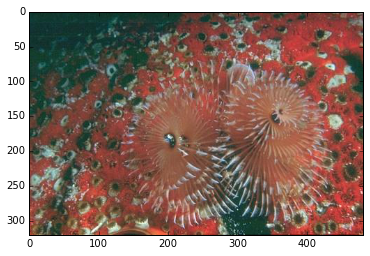

In [6]:
showim(img)

In [7]:
cv2.imwrite('image.jpeg',img)

True

### 1 b) Image smoothing

In [6]:
img1 = readim("data/img/19021.jpg")
img2 = readim("data/img/14037.jpg")
img3 = readim("data/img/16077.jpg")

In [9]:
img1.shape

(321, 481, 3)

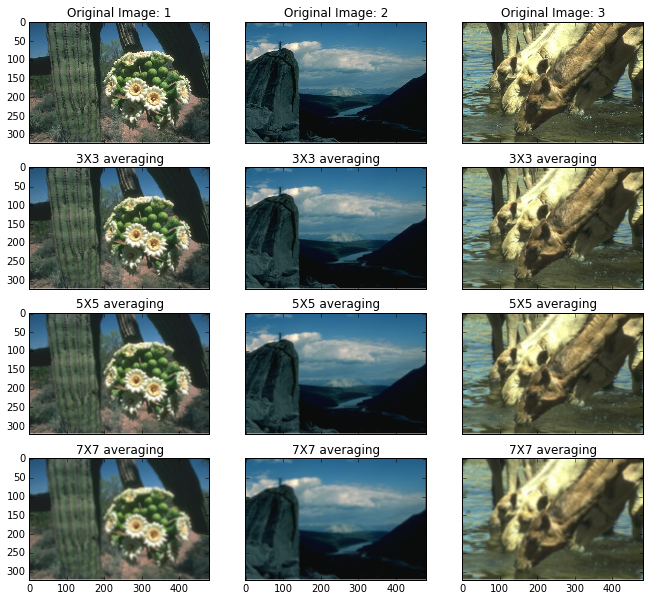

In [10]:
f, plots = plt.subplots(4, 3, sharex='col', sharey='row',figsize=(11,10))
plots= plots.flatten()
for i in xrange(3):
    plots[i].imshow(eval("img" + str(i+1)))
    title = 'Original Image: %s' % (i+1)
    plots[i].set_title(title)
for i in xrange(3,6):
    j = (i+1) - 3
    plots[i].imshow(cv2.blur(eval("img" + str(j)), (3,3)))
    title = '3X3 averaging'
    plots[i].set_title(title)
for i in xrange(6,9):
    j = (i+1) - 6
    plots[i].imshow(cv2.blur(eval("img" + str(j)), (5,5)))
    title = '5X5 averaging'
    plots[i].set_title(title)
for i in xrange(9,12):
    j = (i+1) - 9
    plots[i].imshow(cv2.blur(eval("img" + str(j)), (7,7))) 
    title = '7X7 averaging'
    plots[i].set_title(title)


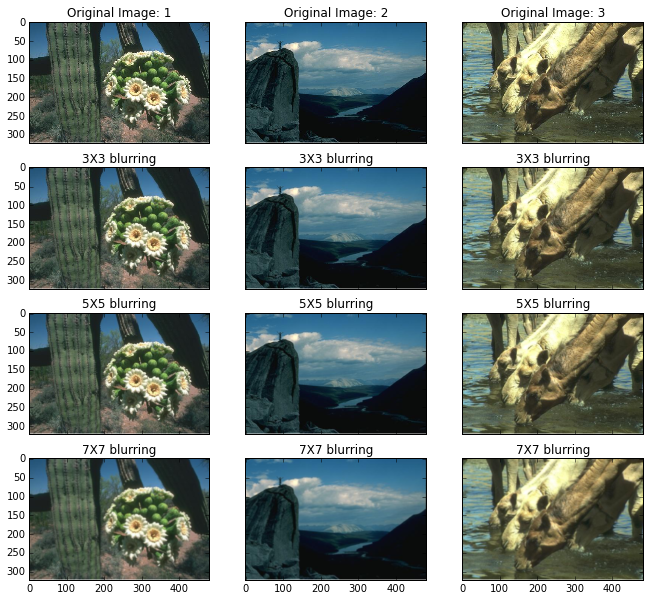

In [11]:
f, plots = plt.subplots(4, 3, sharex='col', sharey='row',figsize=(11,10))
plots= plots.flatten()
for i in xrange(3):
    plots[i].imshow(eval("img" + str(i+1)))
    title = 'Original Image: %s' % (i+1)
    plots[i].set_title(title)
for i in xrange(3,6):
    j = (i+1) - 3
    plots[i].imshow(cv2.GaussianBlur(eval("img" + str(j)), (3,3),0))
    title = '3X3 blurring'
    plots[i].set_title(title)
for i in xrange(6,9):
    j = (i+1) - 6
    plots[i].imshow(cv2.GaussianBlur(eval("img" + str(j)), (5,5),0))
    title = '5X5 blurring'
    plots[i].set_title(title)
for i in xrange(9,12):
    j = (i+1) - 9
    plots[i].imshow(cv2.GaussianBlur(eval("img" + str(j)), (7,7),0)) 
    title = '7X7 blurring'
    plots[i].set_title(title)

In [12]:
images = []
for i in range(1,6):
    images.append(readim("data/snp/"+str(i)+".jpg"))

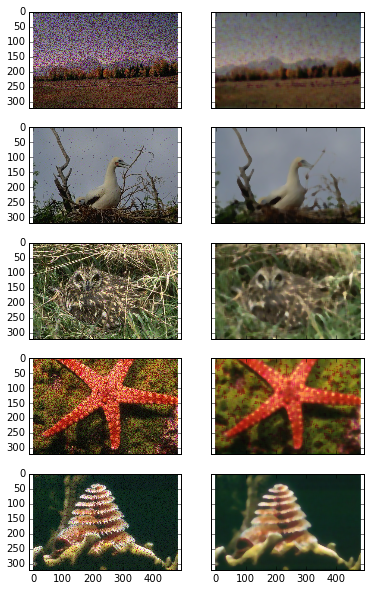

In [13]:
f, plots = plt.subplots(5, 2, sharex='col', sharey='row',figsize=(6,10))
plots= plots.flatten()
for i in range(5):
    plots[2*i].imshow(images[i])
    plots[2*i+1].imshow(cv2.medianBlur(images[i],11))


### Image enhancement
2 a) Histogram

In [8]:
def plot_hist(image, plt):
    color = ('r','g','b')
    for i,col in enumerate(color):
        histr = cv2.calcHist([image],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
#         plt.xlim([0,256])
    
    

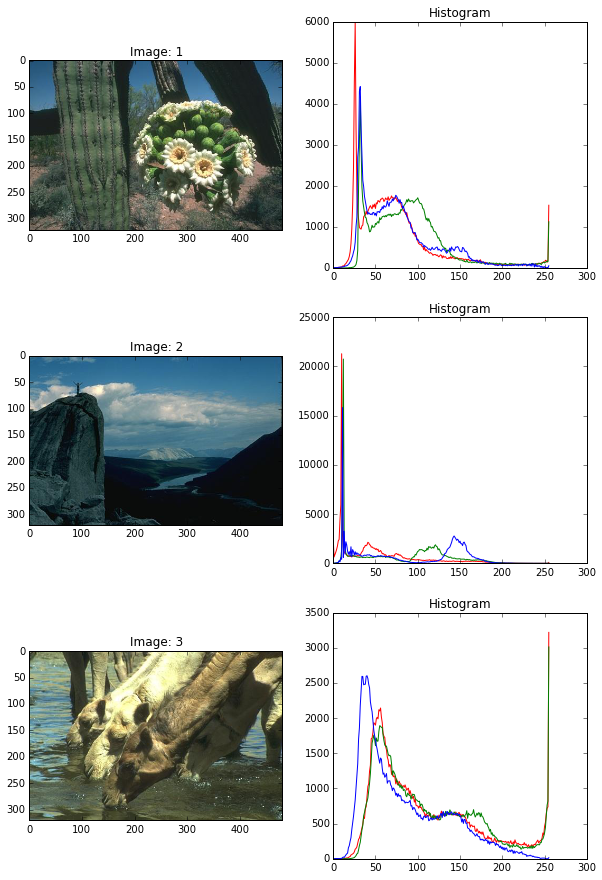

In [15]:
f, plots = plt.subplots(3, 2,figsize=(10,15))
plots= plots.flatten()
for i in xrange(3):
    plots[2*i].imshow(eval("img" + str(i+1)))
    title = 'Image: %s' % (i+1)
    plots[2*i].set_title(title)
    plot_hist(eval("img" + str(i+1)), plots[2*i + 1])
    plots[2*i + 1].set_title("Histogram")
    

### 2 b) Global Histogram Equalization

In [27]:
def hist_equalization(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    l,u,v = cv2.split(img)
    l = cv2.equalizeHist(l)
    img = cv2.merge([l,u,v])
    img = cv2.cvtColor(img, cv2.COLOR_LUV2RGB)
    return img

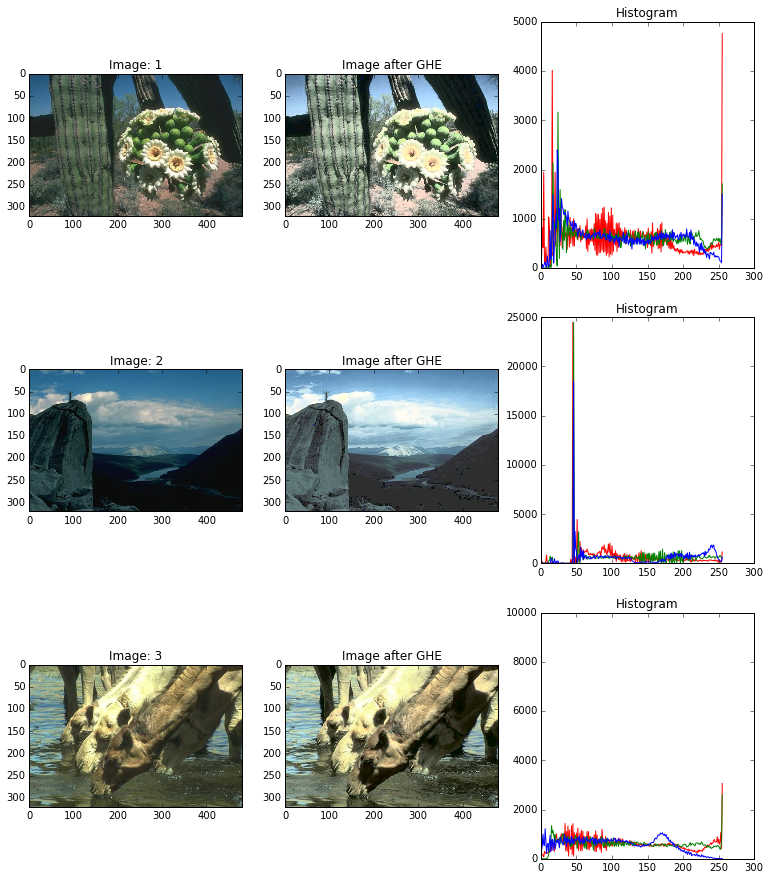

In [31]:
f, plots = plt.subplots(3, 3,figsize=(13,15))
plots= plots.flatten()
for i in xrange(3):
    img = eval("img" + str(i+1))
    plots[3*i].imshow(img)
    title = 'Image: %s' % (i+1)
    plots[3*i].set_title(title)
    
    img_eq = hist_equalization(img)
    plots[3*i + 1].imshow(img_eq)
    plots[3*i + 1].set_title("Image after GHE")

    
    plot_hist(img_eq, plots[3*i + 2])
    plots[3*i + 2].set_title("Histogram")
    

### 2. c) Adaptive Histogram Equalization (CLAHE)

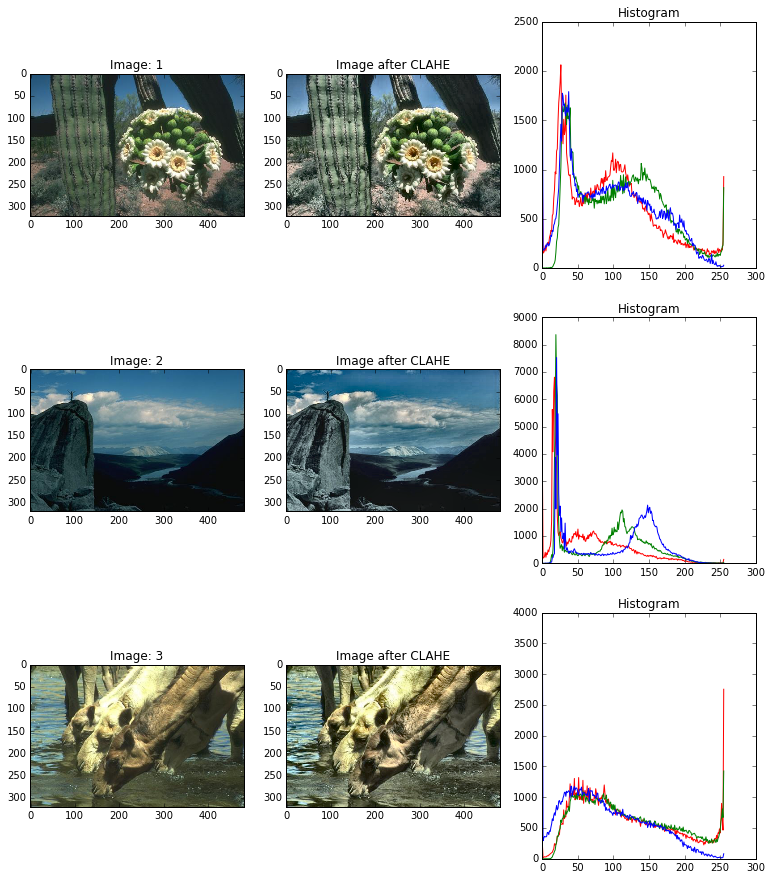

In [9]:
clahe_obj = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
def clahe(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    l,u,v = cv2.split(img)
    l = clahe_obj.apply(l)
    img = cv2.merge([l,u,v])
    img = cv2.cvtColor(img, cv2.COLOR_LUV2RGB)
    return img

f, plots = plt.subplots(3, 3,figsize=(13,15))
plots= plots.flatten()
for i in xrange(3):
    img = eval("img" + str(i+1))
    plots[3*i].imshow(img)
    title = 'Image: %s' % (i+1)
    plots[3*i].set_title(title)
    
    img_eq = clahe(img)
    plots[3*i + 1].imshow(img_eq)
    plots[3*i + 1].set_title("Image after CLAHE")

    
    plot_hist(img_eq, plots[3*i + 2])
    plots[3*i + 2].set_title("Histogram")
    

### 3. Edge Detection

In [5]:
images_dir = "data/img/"
images = os.listdir(images_dir)

In [6]:
all_images = [cv2.imread(images_dir+img,0) for img in images]

### Canny

In [72]:
import evaluate

12084.jpg 0.321953873356
14037.jpg 0.718402082888
16077.jpg 0.384518234986
19021.jpg 0.346021074993
21077.jpg 0.61188722871
24077.jpg 0.370425062014
3096.jpg 0.850020401422
33039.jpg 0
37073.jpg 0.741316442251
8023.jpg 0.71271559122


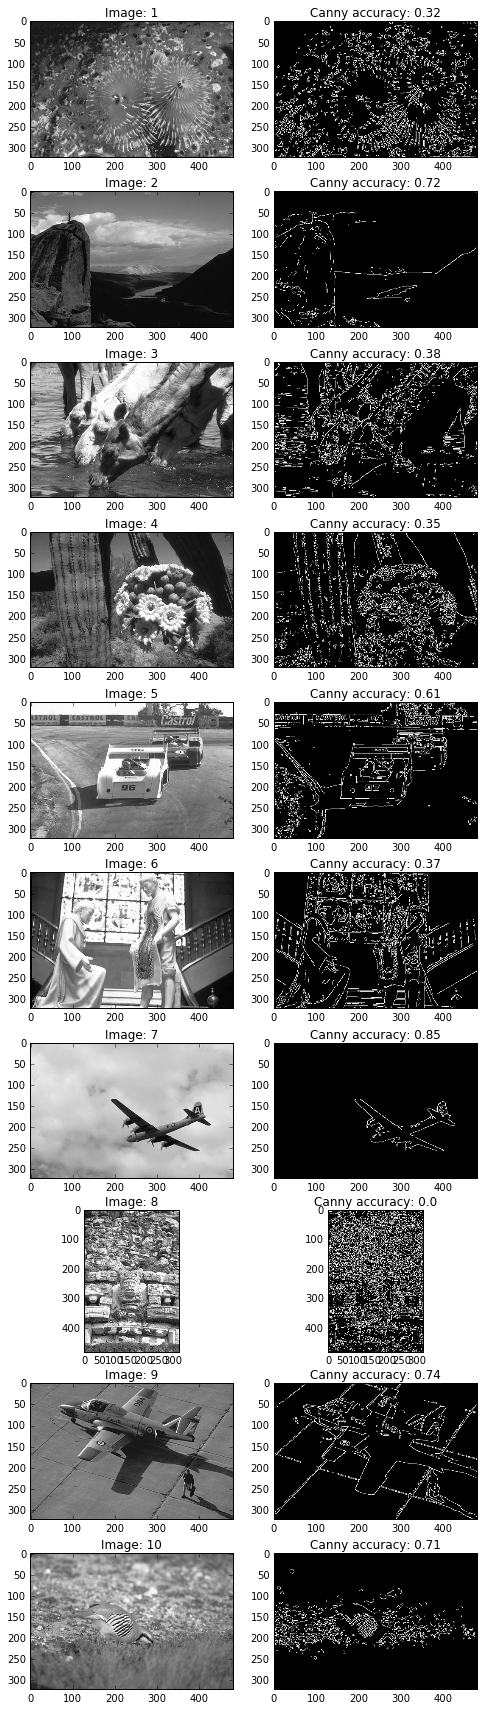

In [84]:
f, plots = plt.subplots(10, 2,figsize=(8,30))
plots= plots.flatten()
mean = 0
for i in xrange(10):
    img = all_images[i]
    plots[2*i].imshow(img,cmap='Greys_r')
    title = 'Image: %s' % (i+1)
    plots[2*i].set_title(title)
    gt = "data/ground_truth/" + images[i].replace(".jpg",".bmp")
    edges = cv2.Canny(img,150,220)
    accuracy = evaluate.evaluate(edges, gt)
    mean += accuracy
    acc = round(accuracy,2)
    print images[i], accuracy
    plots[2*i + 1].imshow(edges, cmap='Greys_r')
    plots[2*i + 1].set_title("Canny accuracy: %s" % (acc))

### Structured forests

In [97]:
mean

7.446545035330082

12084.jpg 0.678182136126
14037.jpg 0.745189474161
16077.jpg 0.802015530987
19021.jpg 0.82372523494
21077.jpg 0.726225866413
24077.jpg 0.543260730177
3096.jpg 0.833725170174
33039.jpg 0.796147693344
37073.jpg 0.640967351248
8023.jpg 0.85710584776


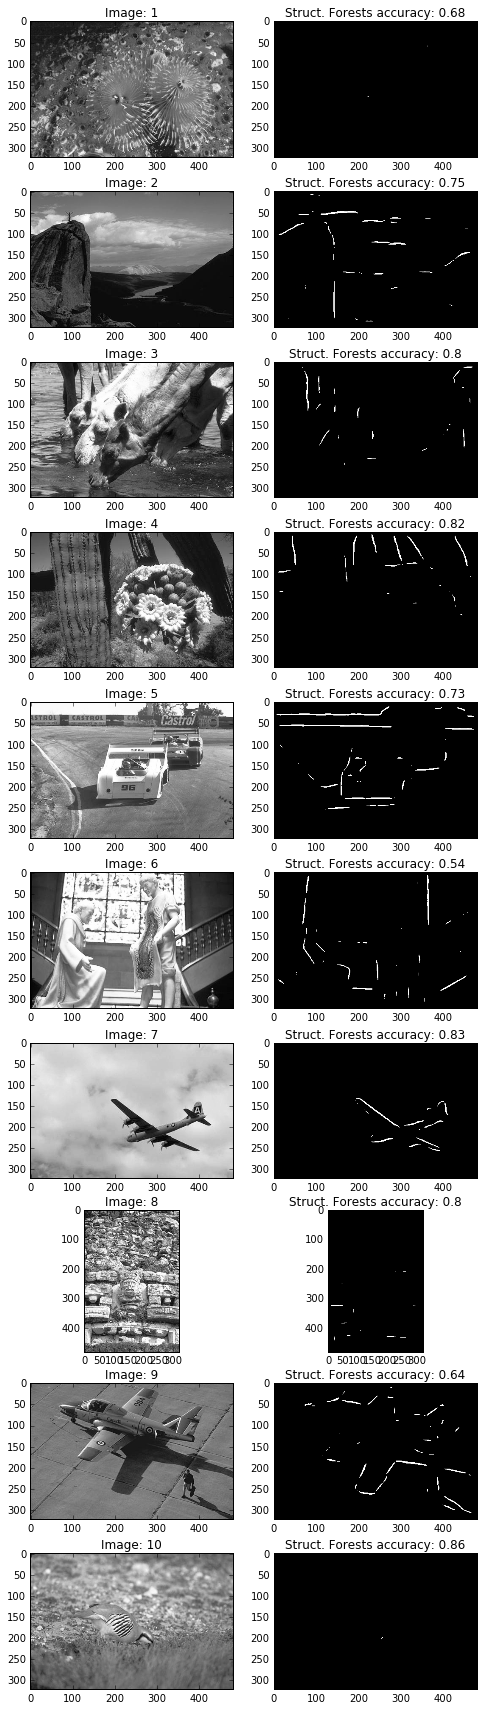

In [96]:
f, plots = plt.subplots(10, 2,figsize=(8,30))
plots= plots.flatten()
mean = 0
for i in xrange(10):
    img = all_images[i]
    plots[2*i].imshow(img,cmap='Greys_r')
    title = 'Image: %s' % (i+1)
    plots[2*i].set_title(title)
    gt = "data/ground_truth/" + images[i].replace(".jpg",".bmp")
    edges = cv2.imread("images/struct_forests/"+ images[i], 0)
    accuracy = evaluate.evaluate(edges, gt)
    mean += accuracy
    acc = round(accuracy,2)
    print images[i], accuracy
    plots[2*i + 1].imshow(edges, cmap='Greys_r')
    plots[2*i + 1].set_title("Struct. Forests accuracy: %s" % (acc))

### Sobel

12084.jpg 0.421758926432
14037.jpg 0.754049520405
16077.jpg 0.535048348132
19021.jpg 0.656951703681
21077.jpg 0.697340043134
24077.jpg 0.474919203891
3096.jpg 0.839515288113
33039.jpg 0
37073.jpg 0.713130096308
8023.jpg 0.814372963906


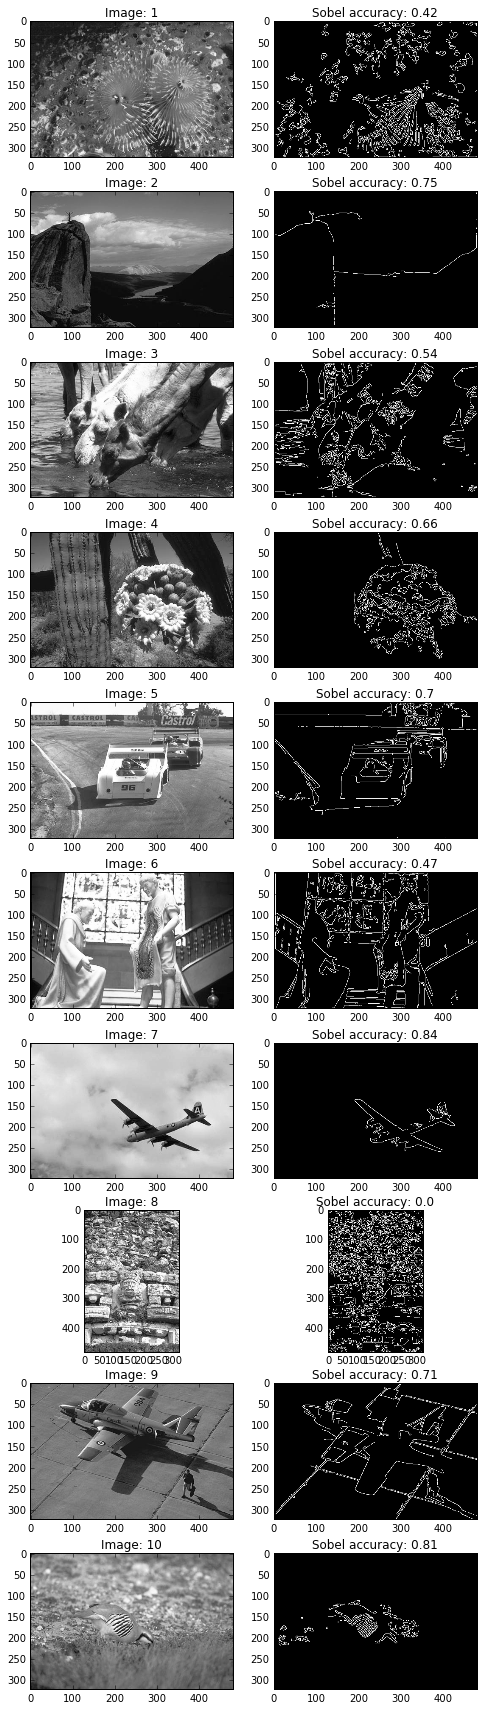

In [94]:
f, plots = plt.subplots(10, 2,figsize=(8,30))
plots= plots.flatten()
mean = 0
for i in xrange(10):
    img = all_images[i]
    plots[2*i].imshow(img,cmap='Greys_r')
    title = 'Image: %s' % (i+1)
    plots[2*i].set_title(title)
    gt = "data/ground_truth/" + images[i].replace(".jpg",".bmp")
    edges = cv2.imread("images/sobel/"+ images[i].replace(".jpg",".png"), 0)
    accuracy = evaluate.evaluate(edges, gt)
    mean += accuracy
    acc = round(accuracy,2)
    print images[i], accuracy
    plots[2*i + 1].imshow(edges, cmap='Greys_r')
    plots[2*i + 1].set_title("Sobel accuracy: %s" % (acc))